# PCA

PCA(Principal Component Analysis)는 주성분 분석이라고도 하며 차원 축소를 통해 최소 차원의 정보로 원래 차원의 정보를 모사(approximate)하려는 작업을 말한다.

## 차원 축소

차원 축소란(Dimension Reduction) 고차원 벡터에서 일부 차원의 값을 모두 0으로 만들어(truncation) 저차원 벡터로 줄이는 것을 말한다. 다만 원래의 고차원 벡터의 특성을 최대한 살리기 위해 가장 분산이 높은 방향으로 회전 변환(rotation transform)을 한다.

<img src="http://www.nlpca.org/fig_pca_principal_component_analysis.png" style="width:90%; margin: 0 auto 0 auto;">

## PCA와 고유값 분해

$D$ 차원의 데이터 $x$가 $N$개 있으면 이 데이터는 특징 행렬 $X \in \mathbf{R}^{N\times D}$로 나타낼 수 있다.

 $D$차원 $\rightarrow$ $M$ 차원 : 차원축소로 벡터 $\hat{x}$으로 변환 

PCA 방법은 선형 변환을 사용한다.

$$
\hat{x}_i = W x_i
$$

이를 행렬식으로 바꾸면 다음과 같다.

$$
\hat{X} = XW^{T}
$$

목표 : $\hat{x}_i$가 원래의 벡터 $x_i$와 가장 유사하게 되는 $W$ 값을 찾는 것

그러나 $\hat{x}_i$는 $M$ 차원 벡터, 

원래의 $D$ 차원 벡터 $x_i$와 차원이 다름,  

$\hat{x}_i$를 도로 $D$ 차원 벡터로 선형 변형하는 최적의 변환행렬 $V \in \mathbf{R}^{M \times D}$를 찾아야 한다. 

역변환 행렬 $V$가 존재한다고 가정

벡터 $x$를 더 낮은 차원의 데이터 $\hat{x} = Wx $으로 변환,

V로 다시 원래의 차원으로 되돌릴 수 있다. 

$$ \hat{\hat{x}} = V \hat{x} $$

물론 이렇게 변환과 역변환을 통해 원래의 차원으로 되돌린 벡터 $V \hat{x}$은 원래의 벡터 $x$와 비슷할 뿐 정확히 같지는 않다. 다만 이 값을 다시 한번 차원 축소 변환하면 도로 $\hat{x}$가 된다. 즉,

$$ W \hat{\hat{x}} = W V \hat{x} = \hat{x} $$

$$ WV = I $$

역변환 행렬 $V$을 알고 있다고 가정하고 역변환을 했을 때 원래 벡터 $x$와 가장 비슷해지는 차원축소 벡터 $\hat{x}$를 다음과 같이 최적화를 이용하여 찾는다.

$$
\arg\min_{\hat{x}} || x - V \hat{x} ||^2
$$

목적함수는 다음과 같이 바꿀 수 있다.

$$
\begin{eqnarray}
|| x - V \hat{x} ||^2 
&=& (x - V \hat{x})^T (x - V \hat{x}) \\
&=& x^Tx - x^T V \hat{x} - \hat{x}^T V^T {x} + \hat{x}^T V^T V \hat{x} \\
&=& x^Tx - 2 x^T V \hat{x} + \hat{x}^T  \hat{x} \\
\end{eqnarray}
$$

이 식을 $\hat{x}$로 미분하면,

$$ - 2 V^Tx + 2\hat{x} = 0$$

$$ \hat{x} = V^Tx $$

가 된다. 원래의 변환식 

$$ \hat{x} = Wx $$

과 비교하면

$$ V = W^{T} $$

임을 알 수 있다. 

이제 남은 문제는 최적의 변환행렬 $W$을 찾는 것이다. 이 경우의 최적화 문제는 다음과 같이 된다.

$$
\arg\min_{W} \sum_{i=1}^N || x_i - W^{T} W x_i ||^2
$$

이 목적함수는 다음과 같이 바꾸어 쓸 수 있다.

$$
\arg\min_{W} || X - X W^{T} W ||^2_{F}
$$

여기에서 
$$ || A ||_F = \sqrt{ \sum_i \sum_j a_{ij}^2 } = \sqrt{ tr (A^TA) } $$

이 최적화 문제의 답 $W^{\ast}$은 공분산 행렬 $XX^T$의 고유값 분해를 사용하여 찾을 수 있다. $W^{\ast}$의 각 열은 가장 큰 고유값부터 $\hat{D}$개의 순차적인 고유값에 대응하는 고유 벡터로 이루어진다. 

### Scikit-Learn 의 PCA 기능

Scikit-Learn 의 decomposition 서브패키지는 PCA분석을 위한 `PCA` 클래스를 제공한다. 사용법은 다음과 같다.


* 입력 인수:	
  * n_components : 정수
    * 최종 성분의 수


* 속성:	
 * `components_`
    * 주성분 축
 * `n_components_` 
    * 주성분의 수
 * `mean_` :
    * 각 성분의 평균
 * `explained_variance_ratio_` 
    * 각 성분의 분산 비율


## 2차원 PCA의 예

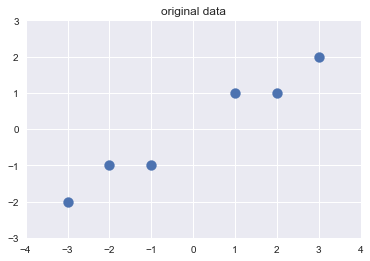

In [4]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("original data")
plt.show()

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
Z = pca.transform(X)
w, V = np.linalg.eig(pca.get_covariance())
V.T.dot(X.T).T

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

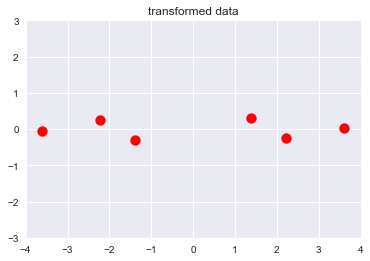

In [7]:
plt.scatter(Z[:,0], Z[:,1], c='r', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed data")
plt.show()

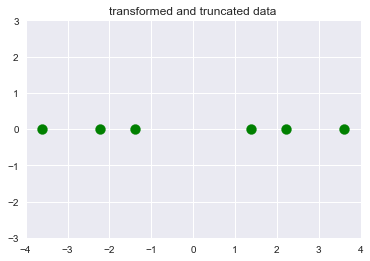

In [8]:
plt.scatter(Z[:,0], np.zeros_like(Z[:,1]), c='g', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed and truncated data")
plt.show()

## IRIS 데이터의 예

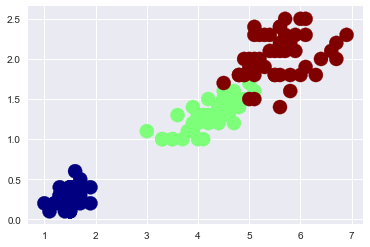

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]
plt.scatter(X[:, 0], X[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

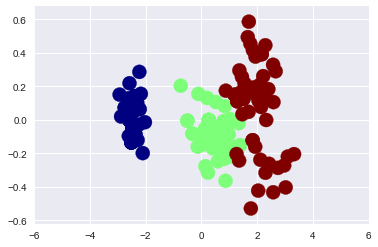

In [10]:
model2 = PCA(2).fit(X)
X2 = model2.transform(X)
plt.scatter(X2[:, 0], X2[:, 1], c=iris.target, s=200, cmap=plt.cm.jet)
plt.xlim(-6, 6)
plt.show()

In [11]:
model2.components_

array([[ 0.92154695,  0.38826694],
       [-0.38826694,  0.92154695]])

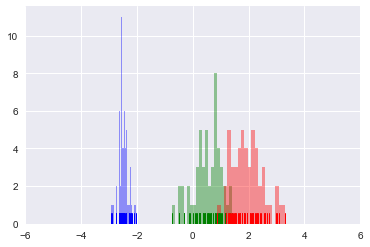

In [12]:
model1 = PCA(1).fit(X)
X1 = model1.transform(X)
sns.distplot(X1[iris.target==0], color="b", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==1], color="g", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==2], color="r", bins=20, rug=True, kde=False)
plt.xlim(-6, 6)
plt.show()

In [13]:
model1.components_

array([[0.92154695, 0.38826694]])

전체 데이터를 변환하면 다음과 같다.

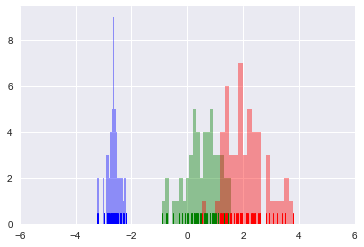

In [14]:
model1 = PCA(1).fit(iris.data)
X1 = model1.transform(iris.data)
sns.distplot(X1[iris.target==0], color="b", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==1], color="g", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==2], color="r", bins=20, rug=True, kde=False)
plt.xlim(-6, 6)
plt.show()

In [15]:
model1.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393]])

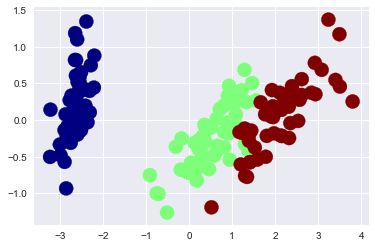

In [16]:
model2 = PCA(2).fit(iris.data)
X2 = model2.fit_transform(iris.data)
plt.scatter(X2[:, 0], X2[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

In [17]:
model2.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

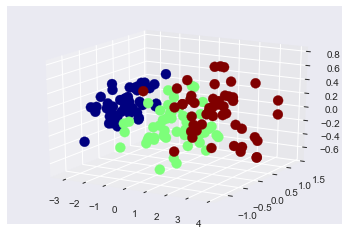

In [18]:
X3 = PCA(3).fit_transform(iris.data)
from mpl_toolkits.mplot3d import Axes3D

def plot_pca(azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(X3[:,0], X3[:,1], X3[:,2], c=iris.target, s=100, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)

plot_pca(-60)

In [19]:
from ipywidgets import widgets
widgets.interact(plot_pca, azim=widgets.IntSlider(min=0, max=180, step=10, value=0));

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widget-interact',))

## 이미지 PCA

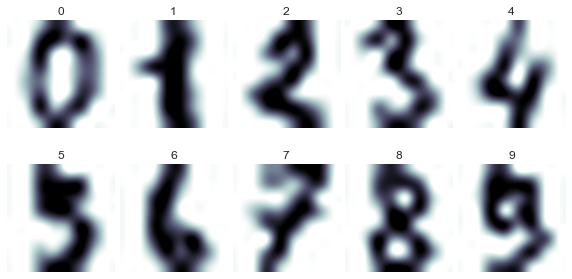

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

N=2; M=5;
fig = plt.figure(figsize=(10, 4))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone_r, interpolation="spline36")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_digits)
print(X_digits.shape)
print(X_pca.shape)

(1797, 64)
(1797, 3)


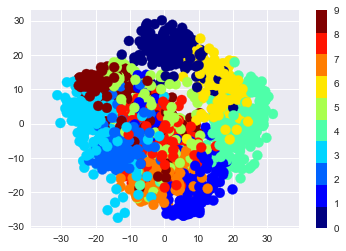

In [22]:
cmap = plt.cm.get_cmap('jet', 10)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_digits, s=100, cmap=cmap)
plt.axis("equal")
plt.colorbar()
plt.show()

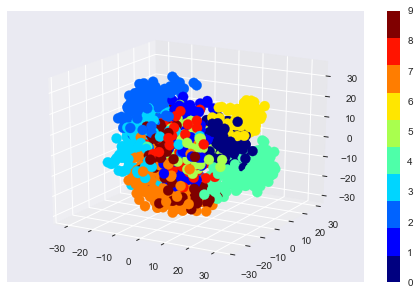

In [23]:
from mpl_toolkits.mplot3d import Axes3D

def plot_pca2(azim):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d');
    p = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_digits, s=100, cmap=cmap, alpha=1)
    plt.colorbar(p)
    ax.view_init(20, azim)

plot_pca2(-60)

In [24]:
from ipywidgets import widgets
widgets.interact(plot_pca2, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widget-interact',))

## 성분 수의 결정

성분의 수가 같은 PCA로 변환된 데이터의 공분산 행렬의 고유값은 원래 데이터의 공분산 행렬의 고유값과 일치한다.
성분의 수를 줄여야 하는 경우에는 가장 고유값이 작은 성분부터 생략한다.


* 원래의  데이터 $X$의 공분산 행렬 $X^TX$의 고유값
 $$ \lambda_1, \lambda_2, \lambda_3, \cdots, \lambda_D $$


* PCA 변환한   데이터 $Z$의 공분산 행렬 $Z^TZ$의 고유값
 $$ \lambda_1,  \cdots, \lambda_L $$


* Explained Variance 
$$ \dfrac{\lambda_1 +  \cdots + \lambda_L}{\lambda_1 + \lambda_2 + \lambda_3 + \cdots + \lambda_D} < 1$$

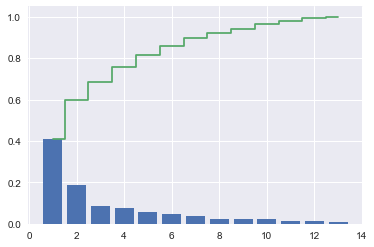

In [25]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA

wine = fetch_mldata("wine")
X, y = wine.data, wine.target

pca = PCA().fit(X)
var = pca.explained_variance_
cmap = sns.color_palette()
plt.bar(np.arange(1,len(var)+1), var/np.sum(var), align="center", color=cmap[0])
plt.step(np.arange(1,len(var)+1), np.cumsum(var)/np.sum(var), where="mid", color=cmap[1])
plt.show()